# Парная линейная регрессия

Парная линейная регрессия - метод статистического анализа. Одна из них (независимая) используется для предсказания другой (зависимой). Зависимость между переменными можно описать прямой линией.

y = b0 + b1 * x

# **Из методички**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [7]:
x.head()

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


In [8]:
x.shape, y.shape

((20,), (20,))

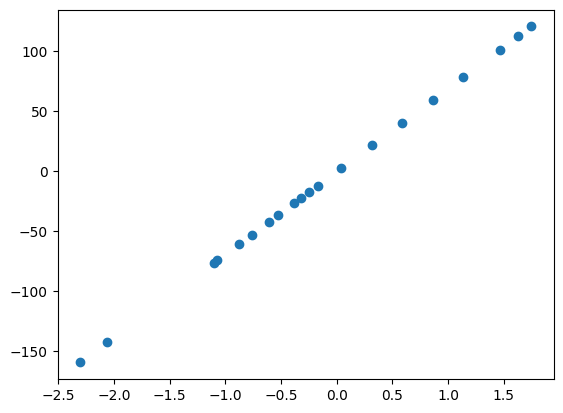

In [9]:
plt.figure() # создает новую фигуру для графика
plt.scatter(x, y) # рисует точечную
plt.show() # отображает график

In [10]:
class Model(object): # Модель парной линейной регрессии
    def __init__(self, max_iter=50):
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter

    def predict(self, x): # предсказания модели для входных х
        return self.b0 + self.b1 * x

    def error(self, x, y): # вычисление среднеквадратичной ошибки (MSE) / 2
        return sum((self.predict(x) - y)**2) / (2 * len(y))

    def fit(self, x, y): # обучение модели с использованием градиентного спуска
        alpha = 0.1 # шаг градиентного спуска
        errors = [self.error(x, y)] # ошибки на каждой итерации

        for _ in range(self.max_iter):
          # градиенты функции ошибки
          dJ0 = sum(self.predict(x) - y) / len(y)
          dJ1 = sum((self.predict(x) - y) * x) / len(y)
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1

          new_error = self.error(x, y)
          old_error = errors[-1]

          if old_error - new_error < 0.000001: # процесс обучения прекращается досрочно
            break

          errors.append(self.error(x, y))

        else:
          print("Warning!") # достиг макс числа итераций

        return errors

График кривой обучения показывает, как ошибка модели изменяется с каждой итерацией градиентного спуска. (обычно ошибка уменьшается, как модель обучается)

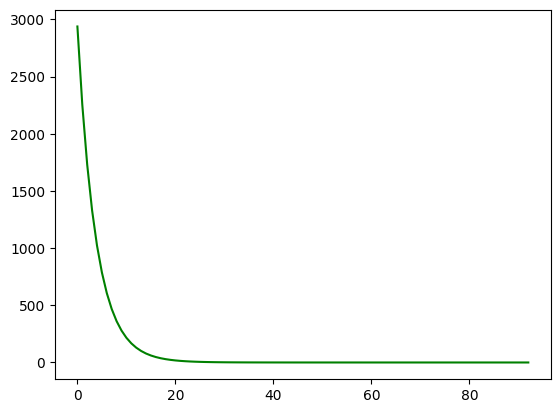

In [11]:
model = Model(max_iter=100)
errors = model.fit(x, y)
plt.plot(errors, 'g')

# Задания для самостоятельного выполнения

*1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.*

На разных начальных значениях параметров проверим, как изменяется ошибка на каждой итерации.


Начальные значения b0=0, b1=0:
Ошибка после обучения: 0.03937321303112907


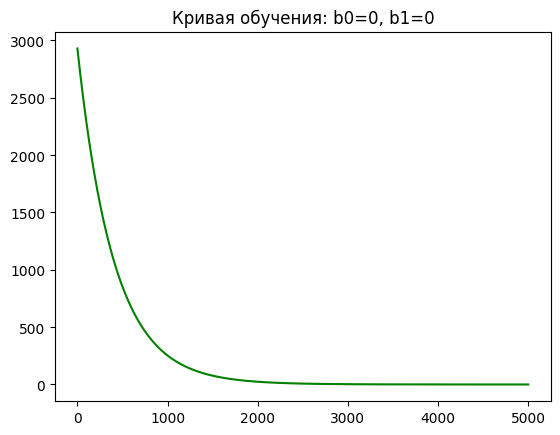


Начальные значения b0=5, b1=-5:
Ошибка после обучения: 0.035460176599721775


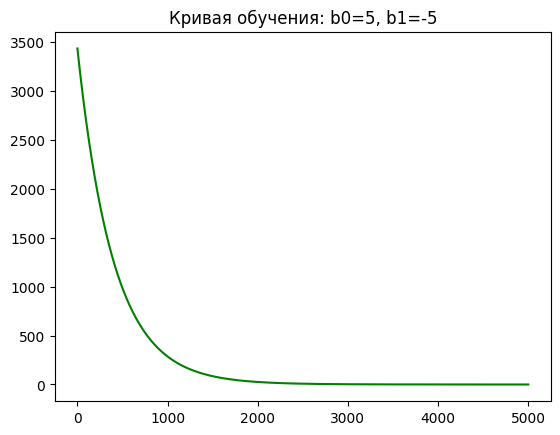


Начальные значения b0=-10, b1=20:
Ошибка после обучения: 0.03725408717628748


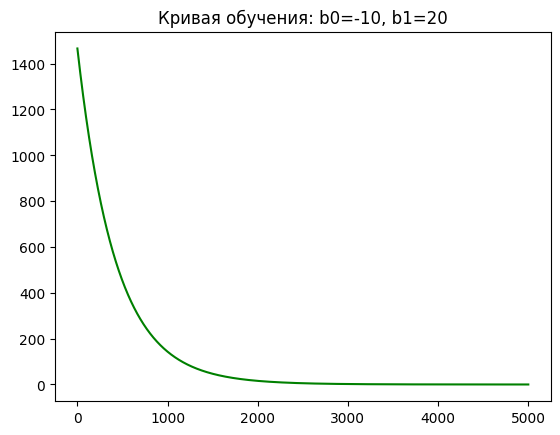


Начальные значения b0=1, b1=1:
Ошибка после обучения: 0.03632269468793788


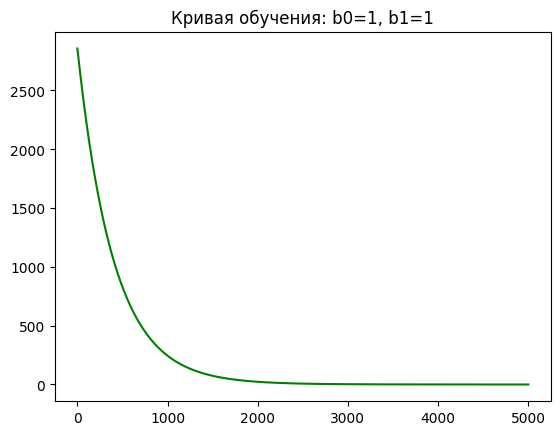

In [12]:
class Model(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if new_err < accuracy:  # ошибка достаточно мала - останавливаем обучение
                break
        return steps, errors


initial_values = [(0, 0), (5, -5), (-10, 20), (1, 1)]
for b0, b1 in initial_values:
    print(f"\nНачальные значения b0={b0}, b1={b1}:")
    hyp = Model(b0, b1)
    steps, errors = hyp.fit(x, y)
    print(f"Ошибка после обучения: {hyp.error(x, y)}")

    # график кривой обучения
    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.title(f"Кривая обучения: b0={b0}, b1={b1}")
    plt.show()


*2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.*

Меняя скорость обучения, будем наблюдать за изменением ошибки. Когда скорость обучения велика, алгоритм может пропускать оптимальное значение и не сходиться. Если скорость мала, то модель будет сходиться очень медленно.


Скорость обучения α=0.0001:


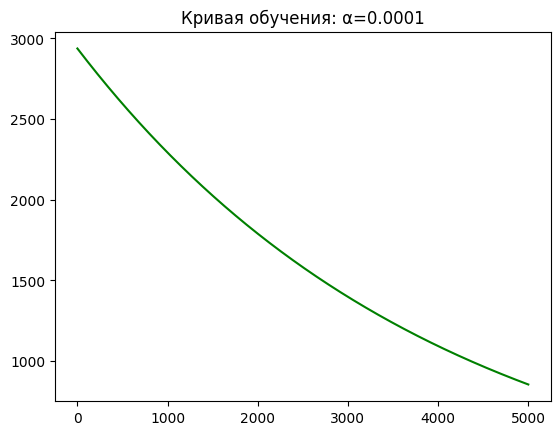

Ошибка после обучения для α=0.0001: 855.0919381472826

Скорость обучения α=0.001:


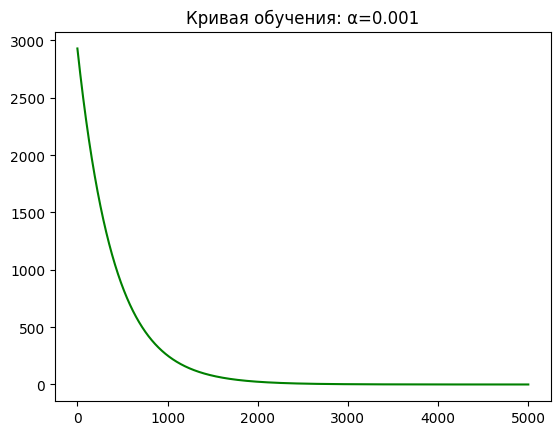

Ошибка после обучения для α=0.001: 0.03937321303112907

Скорость обучения α=0.01:


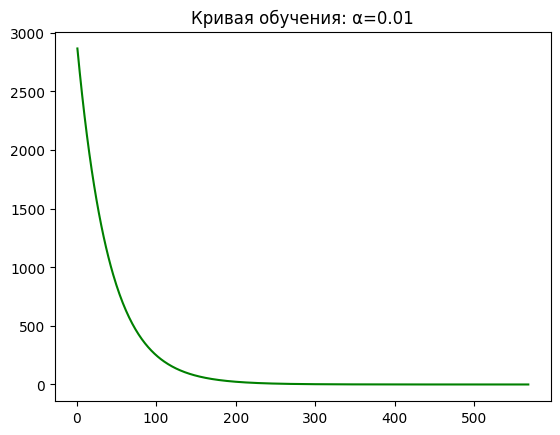

Ошибка после обучения для α=0.01: 0.009808887709615393

Скорость обучения α=0.1:


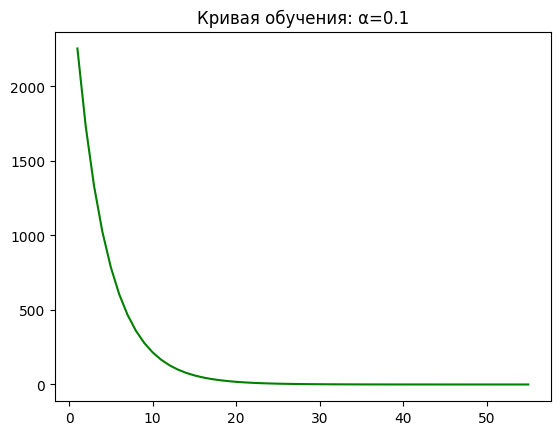

Ошибка после обучения для α=0.1: 0.008384625640821241

Скорость обучения α=1:


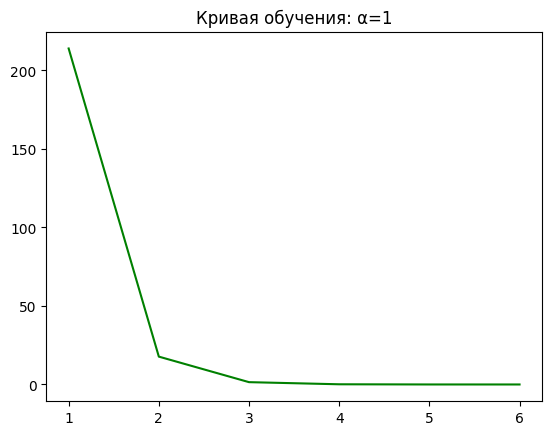

Ошибка после обучения для α=1: 0.0008603627290350645

Скорость обучения α=10:
Ошибка слишком велика, возможно, алгоритм расходится.


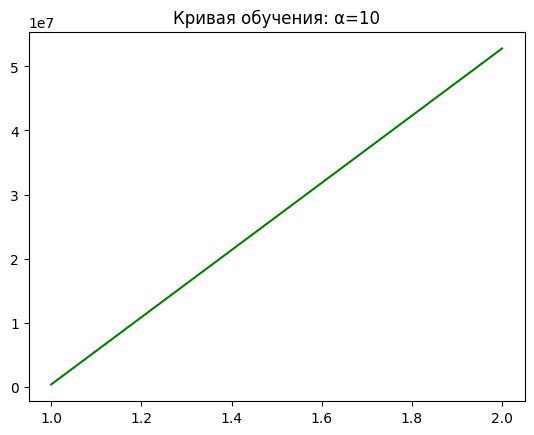

Ошибка после обучения для α=10: 52762785.426702484


In [13]:
class Model(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            # проверка на расходимость
            if new_err > 1e6:  # ошибка слишком большая
                print("Ошибка слишком велика, возможно, алгоритм расходится.")
                break

            if new_err < accuracy:
                break

        return steps, errors


alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for alpha in alpha_values:
    print(f"\nСкорость обучения α={alpha}:")
    hyp = Model(0, 0)  # b0 и b1 равны 0
    steps, errors = hyp.fit(x, y, alpha=alpha)

    # график кривой обучения
    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.title(f"Кривая обучения: α={alpha}")
    plt.show()

    print(f"Ошибка после обучения для α={alpha}: {hyp.error(x, y)}")


*3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.*

In [14]:
x = x.iloc[:, 0] if isinstance(x, pd.DataFrame) else x # берется первый столбец и преобразуется в одномерный объект Series
y = y.iloc[:, 0] if isinstance(y, pd.DataFrame) else y

class Model(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if new_err > 1e6:
                print("Ошибка слишком велика, возможно, алгоритм расходится.")
                break

            if new_err < accuracy:
                break

        return steps, errors


*4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливался, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.*

In [15]:
class Model(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000, min_delta=1e-6):
        steps, errors = [], []
        step = 0
        prev_error = float('inf')  # предыдущее значение ошибки как бесконечность

        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if new_err > 1e6:
                print("Ошибка слишком велика, возможно, алгоритм расходится.")
                break

            if abs(prev_error - new_err) < min_delta: # проверка как понизилась ошибка
                print(f"Ошибка перестала существенно снижаться. Остановка на шаге {step}.")
                break

            prev_error = new_err

        return steps, errors


*5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.*


Скорость обучения α=0.0001:
Алгоритм завершен после 5000 шагов.


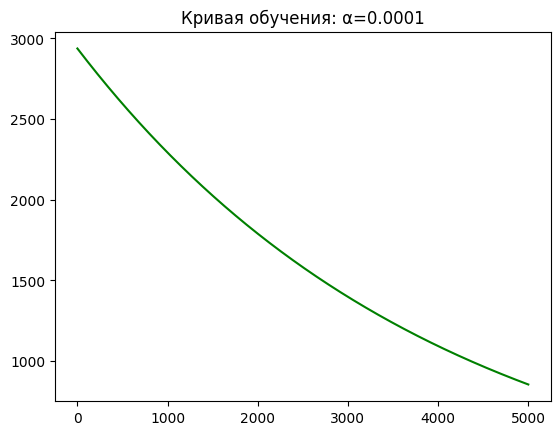

Ошибка после обучения для α=0.0001: 855.0919381472826

Скорость обучения α=0.001:
Алгоритм завершен после 5000 шагов.


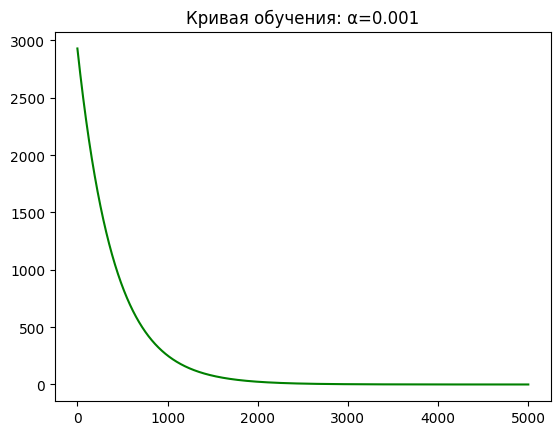

Ошибка после обучения для α=0.001: 0.03937321303112907

Скорость обучения α=0.01:
Ошибка перестала существенно снижаться. Остановка на шаге 841.


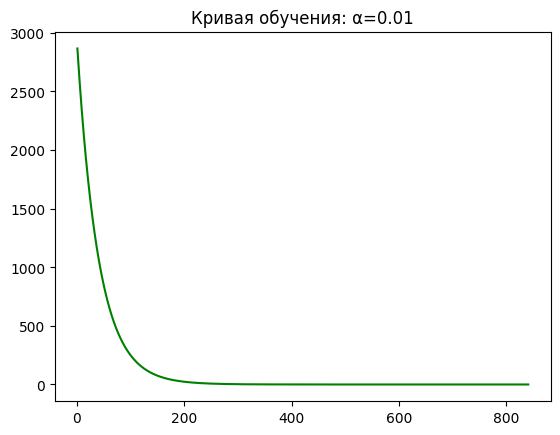

Ошибка после обучения для α=0.01: 5.1965984645194266e-05

Скорость обучения α=0.1:
Ошибка перестала существенно снижаться. Остановка на шаге 93.


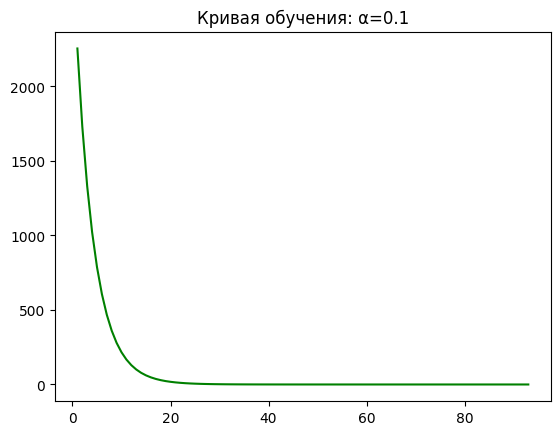

Ошибка после обучения для α=0.1: 4.341656706840177e-06

Скорость обучения α=1:
Ошибка перестала существенно снижаться. Остановка на шаге 10.


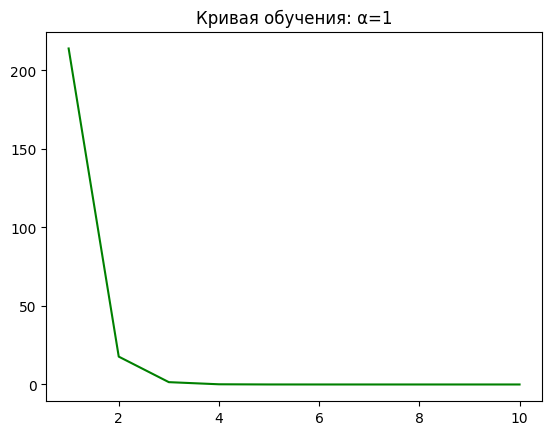

Ошибка после обучения для α=1: 4.1772608368551725e-08

Скорость обучения α=10:
Ошибка слишком велика, возможно, алгоритм расходится.


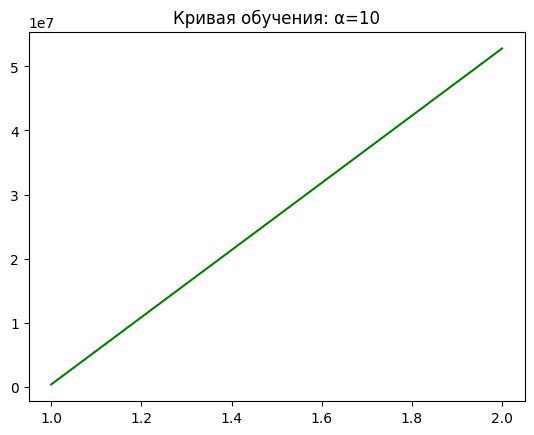

Ошибка после обучения для α=10: 52762785.426702484


In [16]:
class Model(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000, min_delta=1e-6):
        steps, errors = [], []
        step = 0
        prev_error = float('inf')
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if new_err > 1e6:
                print("Ошибка слишком велика, возможно, алгоритм расходится.")
                break

            if abs(prev_error - new_err) < min_delta:
                print(f"Ошибка перестала существенно снижаться. Остановка на шаге {step}.")
                break

            prev_error = new_err

        else:
            print(f"Алгоритм завершен после {max_steps} шагов.")

        return steps, errors

alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for alpha in alpha_values:
    print(f"\nСкорость обучения α={alpha}:")
    hyp = Model(0, 0)
    steps, errors = hyp.fit(x, y, alpha=alpha)

    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.title(f"Кривая обучения: α={alpha}")
    plt.show()

    print(f"Ошибка после обучения для α={alpha}: {hyp.error(x, y)}")


*6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.*

Градиенты стали слишком большими! Уменьшаем alpha с 1.0 до 0.5
Ошибка стабилизировалась. Остановка на шаге 15.


<ipython-input-26-508ea25cea4e>:10: RuntimeWarning: overflow encountered in square
  return np.sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))


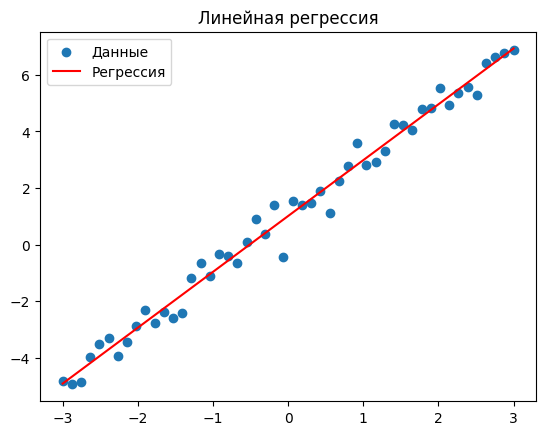

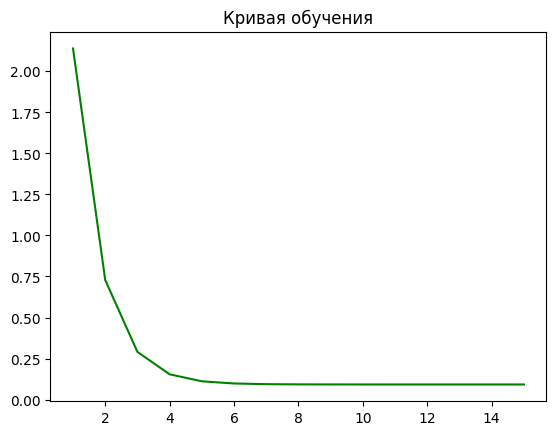

Итоговая ошибка: 0.092638


In [26]:
class Model:
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return np.sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=1.0, max_steps=5000, min_delta=1e-6):
        step, prev_error = 0, float('inf')

        while True:  # цикл для перезапуска при снижении alpha
            self.b0, self.b1 = 0, 0
            steps, errors = [], []

            for step in range(1, max_steps + 1):
                dJ0 = np.sum(self.predict(X) - Y) / len(X)
                dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)

                self.b0 -= alpha * dJ0
                self.b1 -= alpha * dJ1

                new_err = self.error(X, Y)
                steps.append(step)
                errors.append(new_err)

                if np.isnan(new_err) or np.isinf(new_err):
                    print(f"Градиенты стали слишком большими! Уменьшаем alpha с {alpha} до {alpha / 2}")
                    alpha /= 2
                    break  # перезапускаем цикл

                # если на первом шаге ошибка увеличилась, уменьшаем alpha
                if step == 1 and new_err > prev_error:
                    print(f"Ошибка увеличилась, уменьшаем alpha с {alpha} до {alpha / 2}")
                    alpha /= 2
                    break  # перезапускаем

                # проверка на сходимость
                if abs(prev_error - new_err) < min_delta:
                    print(f"Ошибка стабилизировалась. Остановка на шаге {step}.")
                    return steps, errors

                prev_error = new_err

            else:
                print(f"Достигнуто максимальное число шагов: {max_steps}.")
                return steps, errors


x = np.linspace(-3, 3, 50)
y = 2 * x + 1 + np.random.randn(50) * 0.5
# randn создает 50 случайных чисел из нормального распределения
# шум добавляется чтобы коэффициенты не были идеально линейными

hyp = Model()
steps, errors = hyp.fit(x, y)

# график регрессии
X0 = np.linspace(-3, 3, 100)
plt.scatter(x, y, label="Данные")
plt.plot(X0, hyp.predict(X0), 'r', label="Регрессия")
plt.legend()
plt.title("Линейная регрессия")
plt.show()

# график кривой обучения
plt.plot(steps, errors, 'g')
plt.title("Кривая обучения")
plt.show()

print(f"Итоговая ошибка: {hyp.error(x, y):.6f}")


*7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.*

In [28]:
class Model(object):
    def __init__(self, max_iter=50):
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, x, y):
        return sum((self.predict(x) - y)**2) / (2 * len(y))

    def fit(self, x, y):  # обучение модели с использованием градиентного спуска
        alpha = 0.1  # шаг градиентного спуска
        errors = [self.error(x, y)]  # ошибки на каждой итерации

        for _ in range(self.max_iter):
            # градиенты функции ошибки
            dJ0 = sum(self.predict(x) - y) / len(y)
            dJ1 = sum((self.predict(x) - y) * x) / len(y)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_error = self.error(x, y)
            old_error = errors[-1]

            if old_error - new_error < 0.000001:  # процесс обучения прекращается досрочно
                break

            errors.append(self.error(x, y))

        else:
            print("Warning!")  # достиг макс числа итераций

        return errors

    def plot(self, x, y): # метод для построения графиков
        #график регрессии
        X0 = np.linspace(min(x), max(x), 100)
        Y0 = self.predict(X0)
        plt.figure(figsize=(12, 6))

        # График данных и регрессии
        plt.subplot(1, 2, 1)
        plt.scatter(x, y, color='blue', label='Данные')
        plt.plot(X0, Y0, 'r', label='Предсказание')
        plt.title("Линейная регрессия")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()

        # график кривой обучения
        plt.subplot(1, 2, 2)
        errors = self.fit(x, y)
        plt.plot(errors, color='green', label='Ошибка')
        plt.title("Кривая обучения")
        plt.xlabel("Шаги")
        plt.ylabel("Ошибка")
        plt.legend()

        plt.tight_layout()
        plt.show()


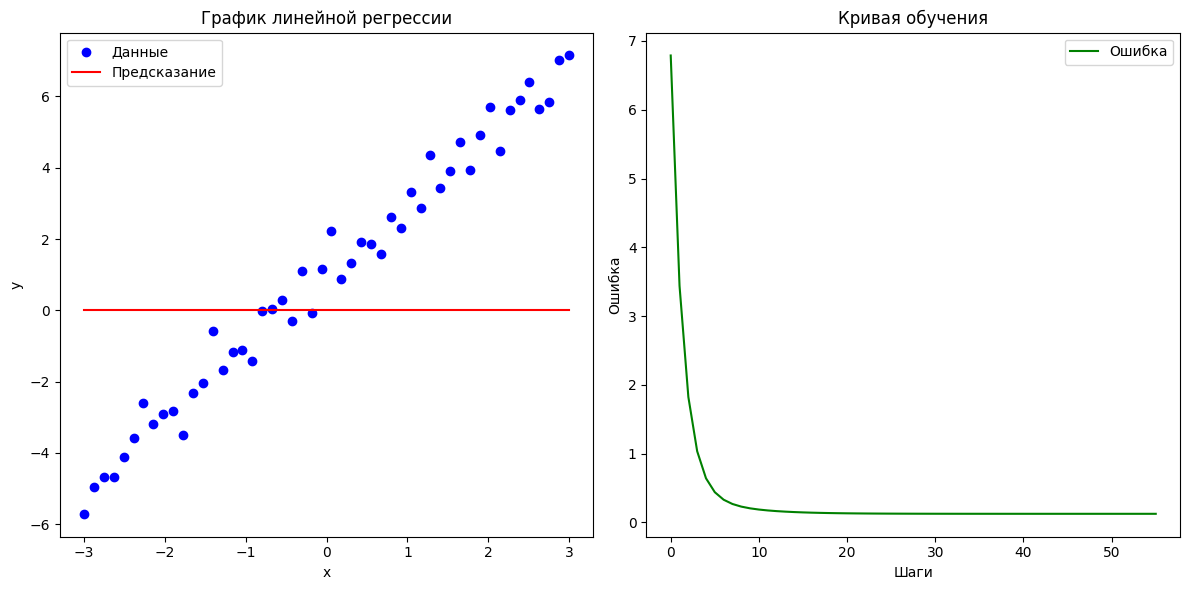

In [29]:
x = np.linspace(-3, 3, 50)
y = 2 * x + 1 + np.random.randn(50) * 0.5

model = Model(max_iter=100)
model.plot(x, y)
